In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
plt.style.use("ggplot")
mpl.rcParams["axes.unicode_minus"]=False

In [2]:
train=pd.read_csv("data/train.csv",parse_dates=["datetime"])
train.shape

(10886, 12)

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [5]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

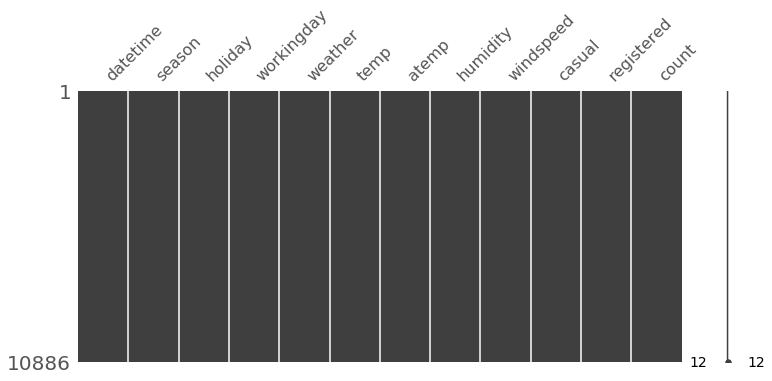

In [6]:
import missingno as msno
msno.matrix(train,figsize=(12,5))

In [7]:
train["year"] = train["datetime"].dt.year
train["month"]= train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second

In [8]:
train.shape

(10886, 18)

In [9]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


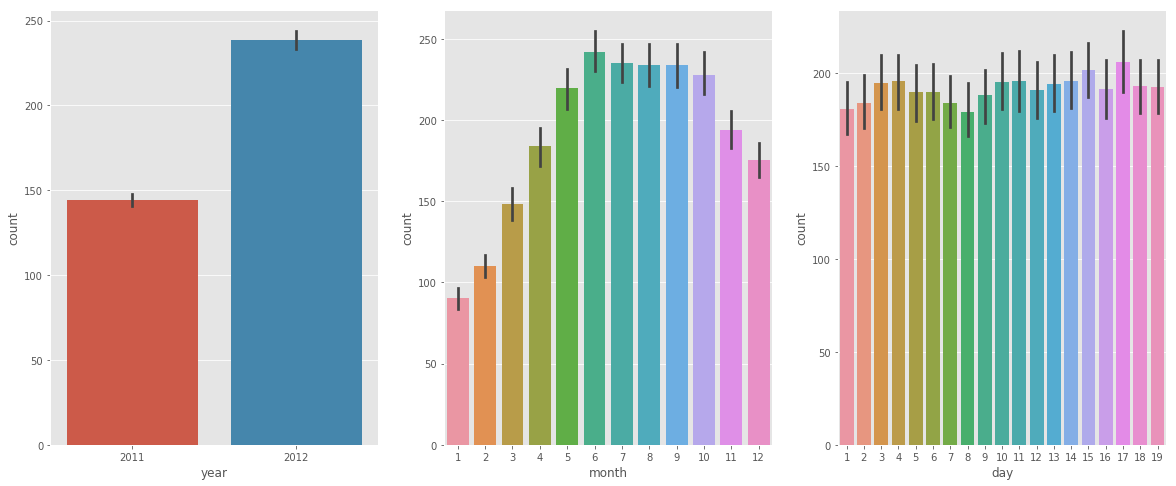

In [10]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(data=train,x="year",y="count",ax=ax[0])
sns.barplot(data=train,x="month",y="count",ax=ax[1])
sns.barplot(data=train,x="day",y="count",ax=ax[2])

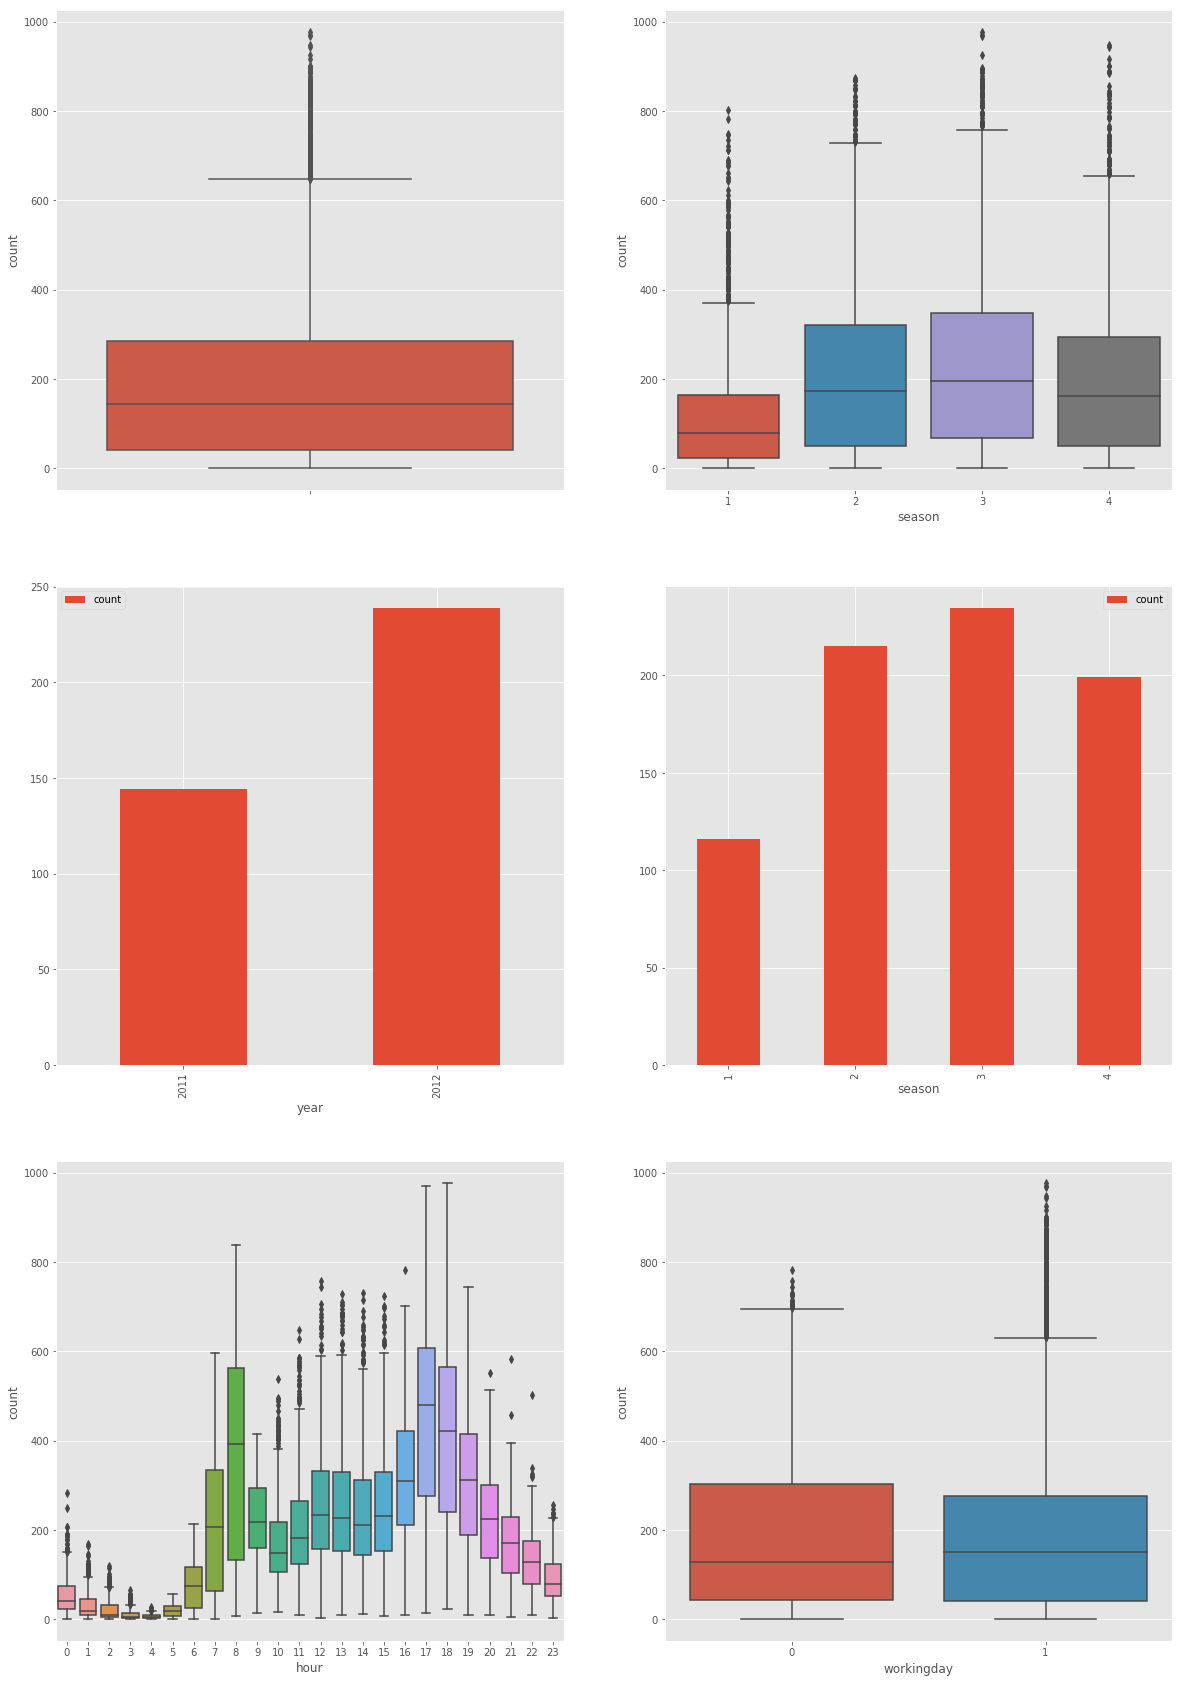

In [11]:
f,ax=plt.subplots(3,2,figsize=(20,30))
sns.boxplot(data=train,y="count",ax=ax[0,0])
sns.boxplot(data=train,x="season",y="count",ax=ax[0,1])
train[["year","count"]].groupby("year").mean().plot.bar(ax=ax[1,0])
train[["season","count"]].groupby("season").mean().plot.bar(ax=ax[1,1])
sns.boxplot(data=train,y="count",x="hour",orient="v",ax=ax[2,0])
sns.boxplot(data=train,y="count",x="workingday",orient="v",ax=ax[2,1])

In [12]:
train["dayofweek"]=train["datetime"].dt.dayofweek

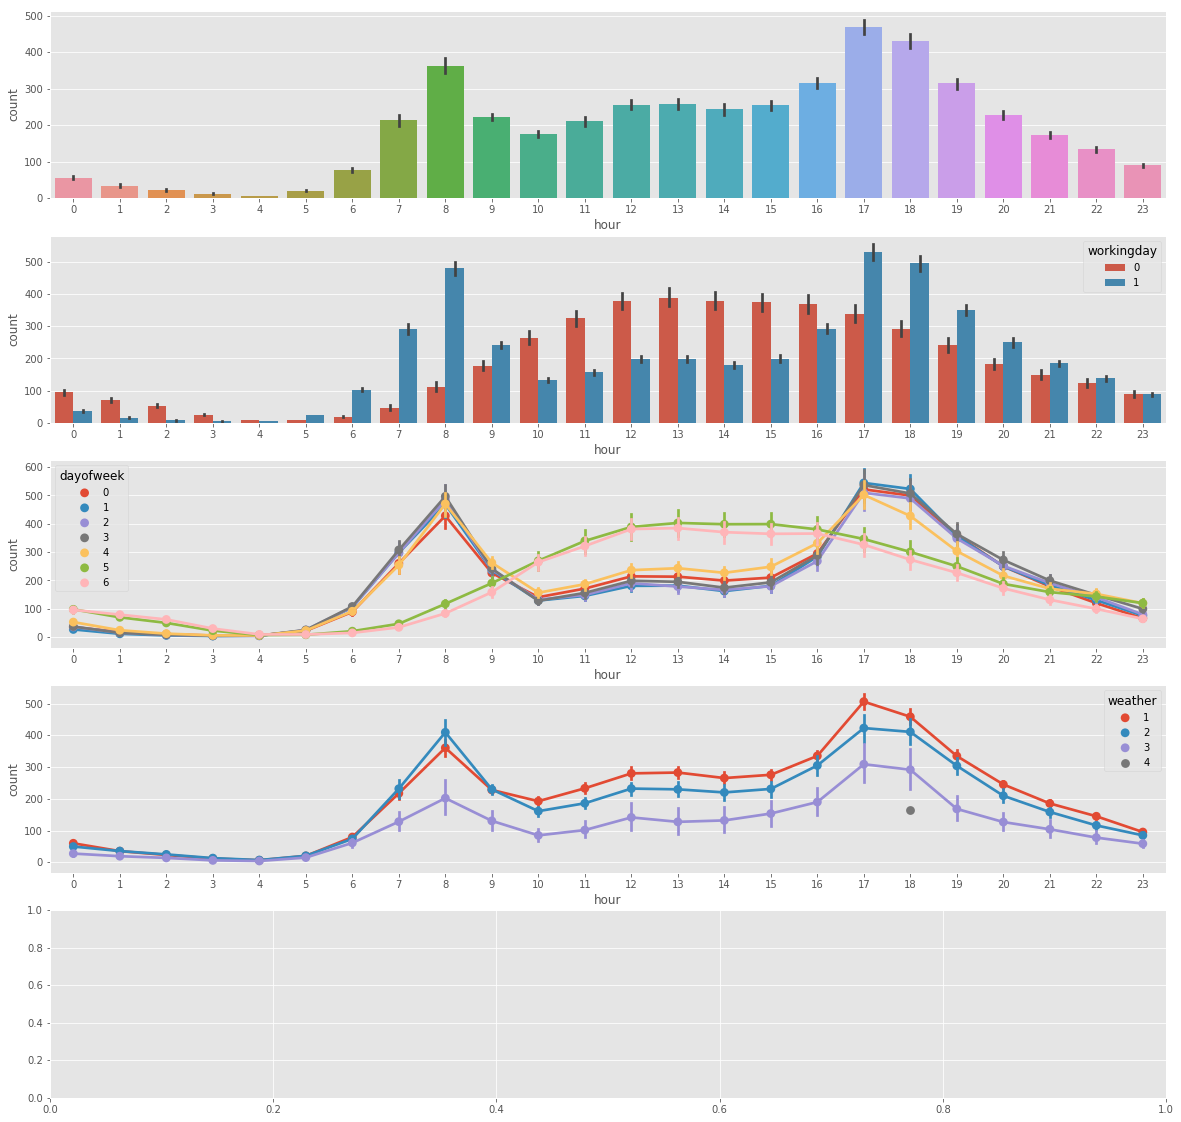

In [13]:
f,ax=plt.subplots(5,1,figsize=(20,20))
sns.barplot(data=train,x="hour",y="count",ax=ax[0])
sns.barplot(data=train,x="hour",y="count",hue="workingday",ax=ax[1])
sns.pointplot(data=train,x="hour",y="count",hue="dayofweek",ax=ax[2])
sns.pointplot(data=train,x="hour",y="count",hue="weather",ax=ax[3])


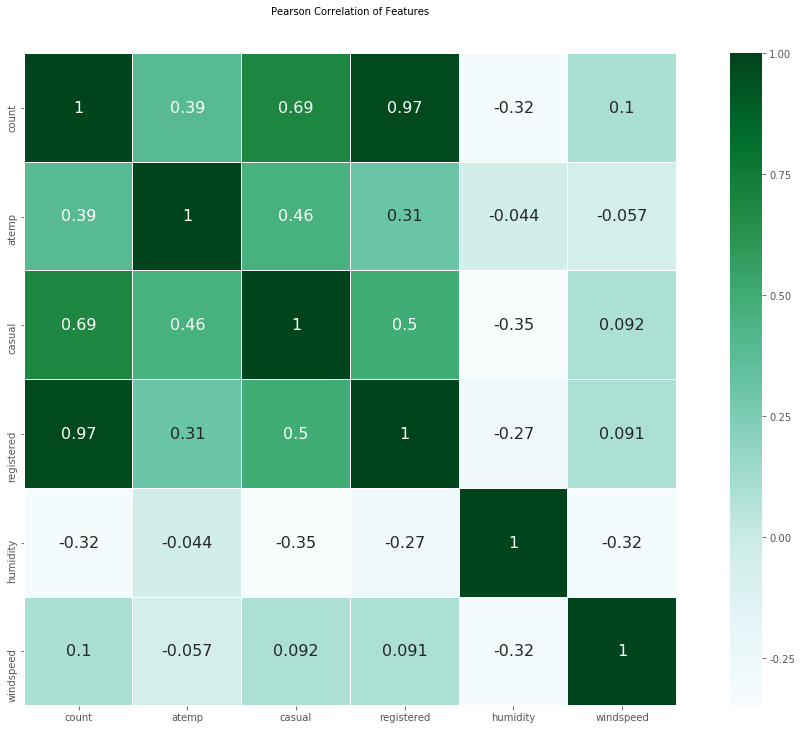

In [14]:
heatmap_data = train[['count','atemp','casual','registered','humidity','windspeed']]

colormap=plt.cm.BuGn
plt.figure(figsize=(19,12))
plt.title('Pearson Correlation of Features',y=1.05,size=10)
sns.heatmap(heatmap_data.astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True, cmap=colormap,annot=True,annot_kws={'size':16})

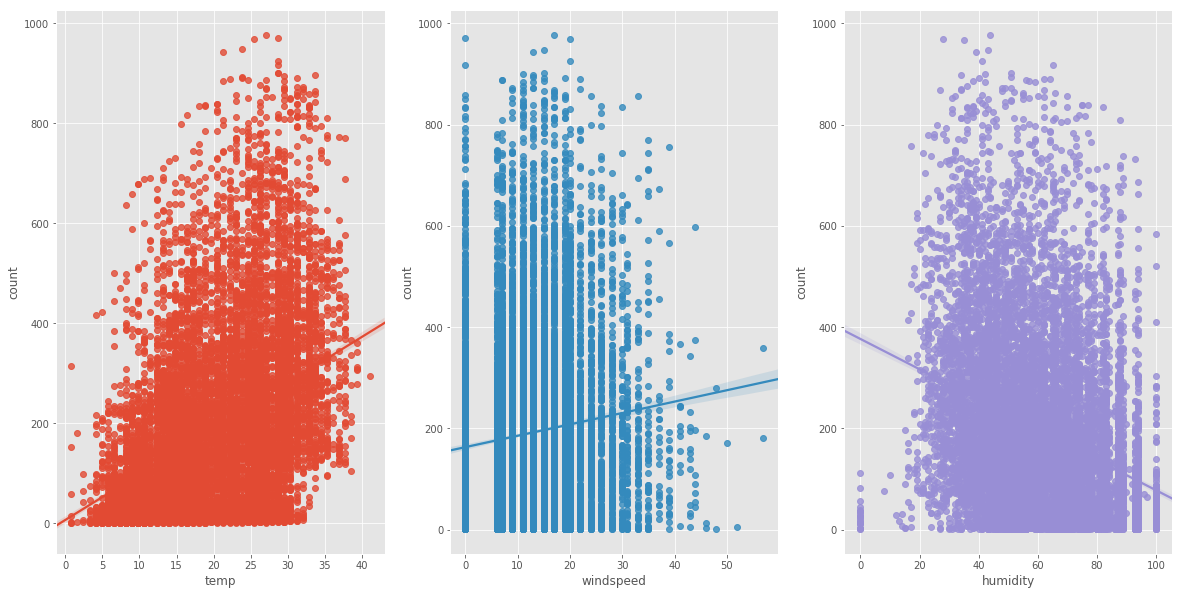

In [15]:
fig,ax=plt.subplots(1,3,figsize=(20,10))
sns.regplot(data=train,x="temp",y="count",ax=ax[0])
sns.regplot(data=train,x="windspeed",y="count",ax=ax[1])
sns.regplot(data=train,x="humidity",y="count",ax=ax[2])


In [16]:
def concat_year_month(datetime):
    return "{0}-{1}".format(datetime.year,datetime.month)
train["year_month"]=train["datetime"].apply(concat_year_month)
print(train.shape)
train[["datetime","year_month"]].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


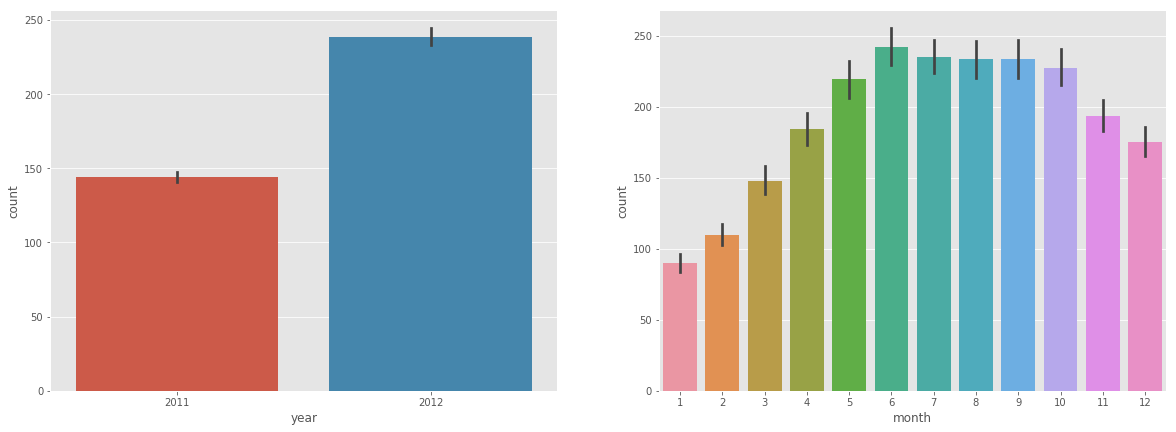

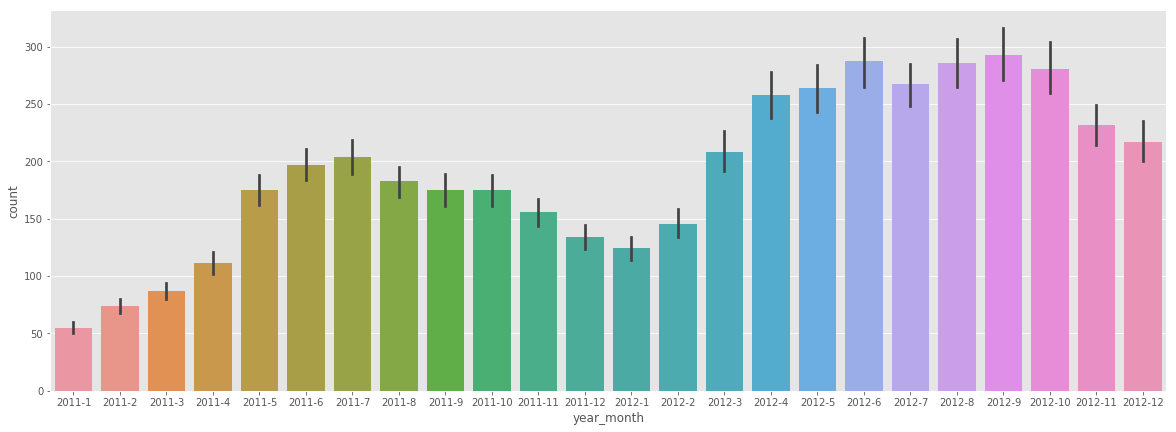

In [17]:
f,ax=plt.subplots(1,2,figsize=(20,7))
sns.barplot(data=train,x="year",y="count",ax=ax[0])
sns.barplot(data=train,x="month",y="count",ax=ax[1])
f,ax=plt.subplots(1,1,figsize=(20,7))
sns.barplot(data=train,x="year_month",y="count",ax=ax)

In [23]:
train_without_outliers=train[np.abs(train["count"]-train["count"].mean())<=3*train["count"].mean()]

In [24]:
train_without_outliers.shape, train.shape

((10768, 20), (10886, 20))

((array([-3.82886059, -3.6047202 , -3.48171232, ...,  3.48171232,
          3.6047202 ,  3.82886059]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.63594656, 6.6424868 ,
         6.6424868 ])),
 (1.3514484237642128, 4.567962929352254, 0.9586134103979563))

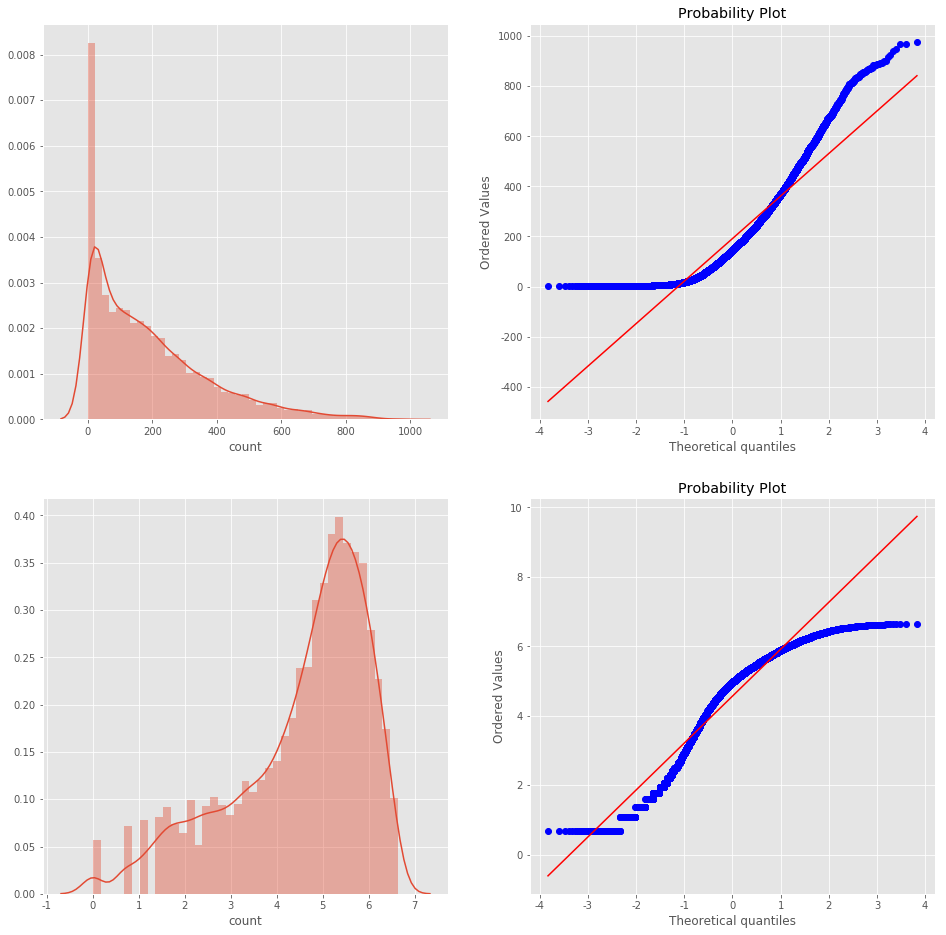

In [28]:
f,ax=plt.subplots(2,2,figsize=(16,16))
sns.distplot(train["count"],ax=ax[0,0])
stats.probplot(train["count"],dist="norm",fit=True,plot=ax[0,1])
sns.distplot(np.log(train_without_outliers["count"]),ax=ax[1,0])
stats.probplot(np.log1p(train_without_outliers["count"]),dist="norm",fit=True,plot=ax[1,1])